## Preguntas a responder

1. ¿Cuáles son los 5 productos más vendidos en términos de unidades y valor?
2. ¿Existen productos con bajo rendimiento?
3. ¿Que paises tienen mayores ventas?

In [ ]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lectura del dataset
df = pd.read_csv('sales_data_integro.csv')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Small


1. ¿Cuáles son los 5 productos más vendidos en términos de unidades y valor?

In [ ]:
#5 productos más vendidos en término de unidades
Productos_unidades=df.groupby("PRODUCTLINE")["QUANTITYORDERED"].sum()
Productos_top_5_unidades=Productos_unidades.sort_values(ascending=False).head(5)
Productos_top_5_unidades


PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_22000\2409200136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Productos_top_5_unidades.index,x=Productos_top_5_unidades.values,palette="Set1",orient="h")


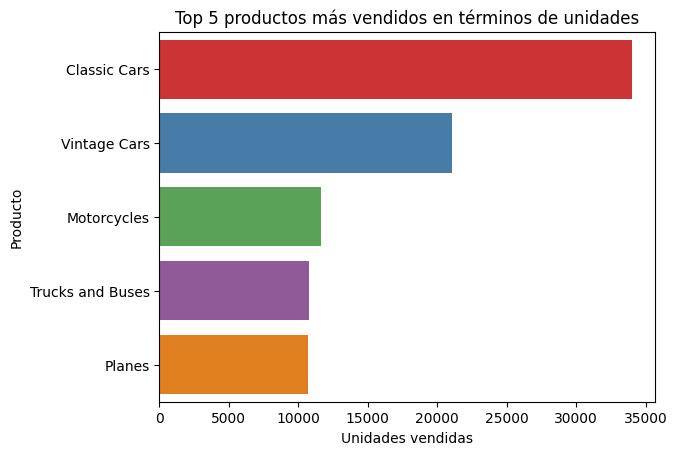

In [70]:
#Visualización de los 5 productos más vendidos en términos de unidades
sns.barplot(y=Productos_top_5_unidades.index,x=Productos_top_5_unidades.values,palette="Set1",orient="h")
plt.title("Top 5 productos más vendidos en términos de unidades")
plt.xlabel("Unidades vendidas")
plt.ylabel("Producto")
plt.show()

In [27]:
#5 productos más vendidos en términos de valor
#Calculo de ingreso por producto
df["Total_income"]=df["QUANTITYORDERED"]*df["PRICEEACH"]
Productos_valor=df.groupby("PRODUCTLINE")["Total_income"].sum()
Productos_top_5_valor=Productos_valor.sort_values(ascending=False).head(5)
Productos_top_5_valor

PRODUCTLINE
Classic Cars        2968546.40
Vintage Cars        1644212.05
Motorcycles          971086.29
Trucks and Buses     947355.18
Planes               877942.21
Name: Total_income, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_22000\2236528402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="PRODUCTLINE", data=df, order=Productos_top_5_valor.index,palette="Set2")


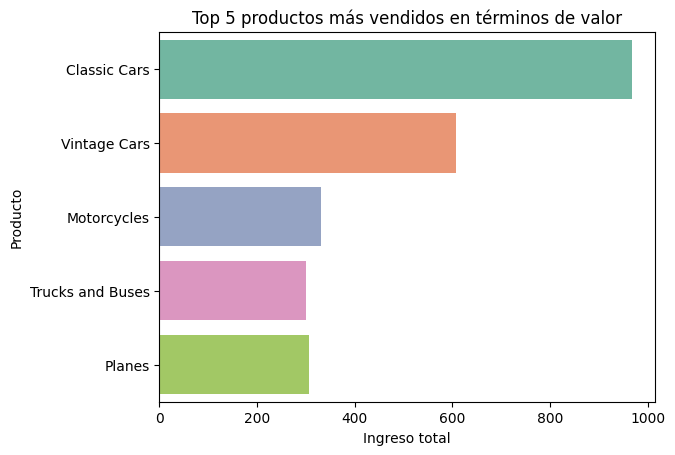

In [69]:
#Visualización de los 5 productos más vendidos en términos de valor
sns.countplot(y="PRODUCTLINE", data=df, order=Productos_top_5_valor.index,palette="Set2")
plt.title("Top 5 productos más vendidos en términos de valor")
plt.xlabel("Ingreso total")
plt.ylabel("Producto")
plt.show()

2. ¿Existen productos con bajo rendimiento? ¿Cuáles son los motivos de las bajas ventas?


In [ ]:

#Identificación de productos con bajo rendimiento, umbral de bajo rendimiento, debajo de percentil 0.25
Producto_percentil_25=Productos_unidades.quantile(0.25)
Productos_bajo_rendimiento=Productos_unidades[Productos_unidades<Producto_percentil_25]
Productos_bajo_rendimiento

PRODUCTLINE
Ships     8127
Trains    2712
Name: QUANTITYORDERED, dtype: int64

3. ¿Que regiones tienen mayores ventas?

In [47]:
#Para saber que paises tienen mayores ventas sumamos el ingreso total por pais
ventas_por_pais=df.groupby("COUNTRY")["Total_income"].sum()
ventas_por_pais.sort_values(ascending=False)

COUNTRY
USA            2986425.21
Spain          1021705.97
France          919257.85
Australia       521598.46
UK              413203.34
Italy           309402.87
Finland         268714.70
Norway          246115.80
Singapore       227985.50
Canada          193504.34
Denmark         192747.63
Germany         178689.08
Sweden          174264.10
Austria         172793.05
Japan           153076.69
Belgium          94528.88
Switzerland      93344.91
Philippines      80291.17
Ireland          43237.24
Name: Total_income, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_22000\1711753278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ventas_por_pais.index,x=ventas_por_pais.values,palette="Paired",orient="h",order=ventas_por_pais.sort_values(ascending=False).index)


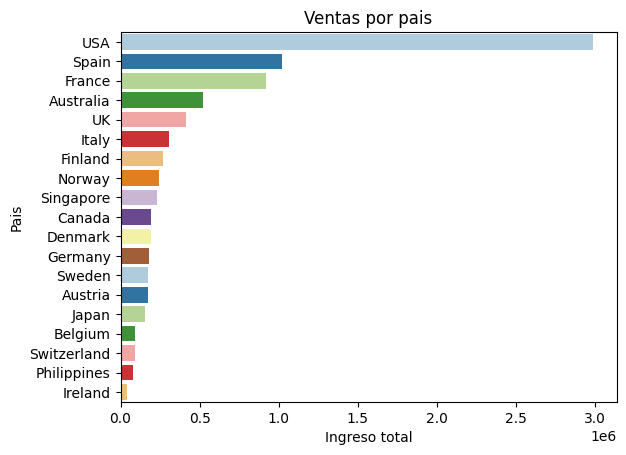

In [67]:
#Visualización de los paises que tienen mayores ventas
sns.barplot(y=ventas_por_pais.index,x=ventas_por_pais.values,palette="Paired",orient="h",order=ventas_por_pais.sort_values(ascending=False).index)
plt.title("Ventas por pais")
plt.xlabel("Ingreso total")
plt.ylabel("Pais")
plt.show()

### Concluciones
#### 1. ¿Cuáles son los 5 productos más vendidos en términos de unidades y valor?
- Productos mas vendidos en términos de unidades:

     Classic Cars--------33992

    Vintage Cars--------21069

    Motorcycles---------11663

    Trucks and Buses----10777

    Planes--------------10727

- Productos más vendidos en términos de valor:

    Classic Cars--------2968546.40

    Vintage Cars--------1644212.05

    Motorcycles---------971086.29

    Trucks and Buses----947355.18

    Planes--------------877942.21

##### 2. ¿Existen productos con bajo rendimiento?

- Si existen productos de bajo rendimiento, estos son:

    Ships------8127

    Trains-----2712

##### 3. ¿Que paises tienen mayores ventas?
- Los paises con mayores ventas (Top 10):
    USA            2986425.21

    Spain          1021705.97

    France          919257.85

    Australia       521598.46

    UK              413203.34

    Italy           309402.87

    Finland         268714.70

    Norway          246115.80

    Singapore       227985.50

    Canada          193504.3
